In [1]:
#!/usr/bin/env python

import wuml 
import numpy as np
import scipy.stats
from wplotlib import histograms
from wplotlib import lines


data = wuml.wData('../../data/shap_regress_example_uniform.csv', row_id_with_label=0)
data.df.style

2021-10-13 08:57:19.953869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


,A,B,C,D,label
0,0.548800,0.715200,0.602800,0.544900,-1.101000
1,0.423700,0.645900,0.437600,0.891800,-5.669000
2,0.963700,0.383400,0.791700,0.528900,0.781900
3,0.568000,0.925600,0.071000,0.087100,3.583400
4,0.020200,0.832600,0.778200,0.870000,-7.504600
5,0.978600,0.799200,0.461500,0.780500,-1.001800
6,0.118300,0.639900,0.143400,0.944700,-8.047900
7,0.521800,0.414700,0.264600,0.774200,-4.142800
8,0.456200,0.568400,0.018800,0.617600,-2.607300
9,0.612100,0.616900,0.943700,0.681800,-2.309800


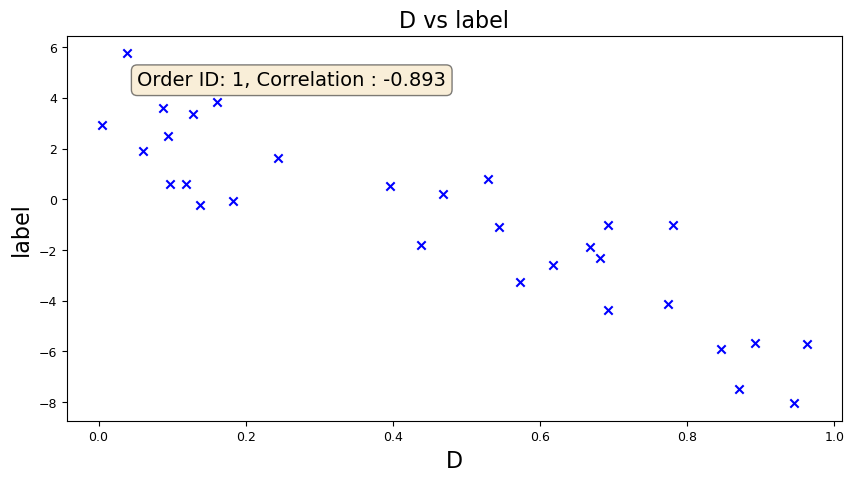

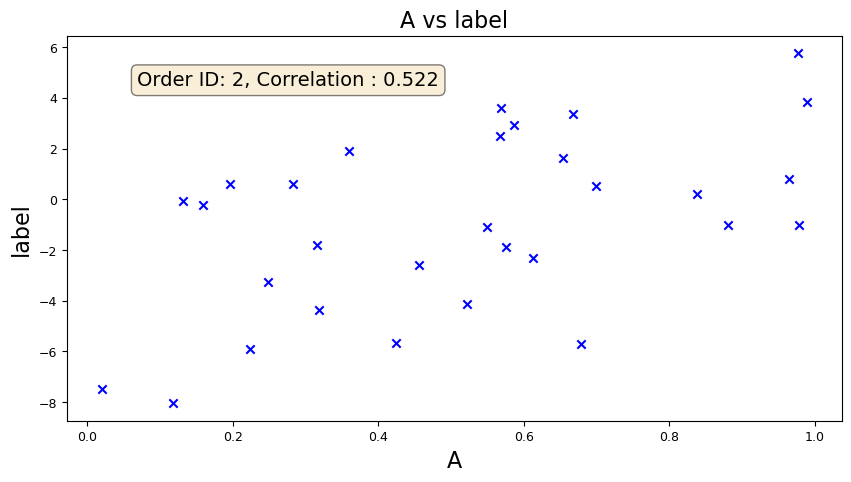

,A,B,C,D,label
A,1.000000,-0.165869,0.216040,-0.099781,0.521788
B,-0.165869,1.000000,-0.281401,0.417273,-0.331656
C,0.216040,-0.281401,1.000000,-0.040410,0.101090
D,-0.099781,0.417273,-0.040410,1.000000,-0.893042
label,0.521788,-0.331656,0.101090,-0.893042,1.000000


In [2]:
#print(wuml.feature_wise_correlation(data).df.style)
corrMatrix = wuml.feature_wise_correlation(data, num_of_top_dependent_pairs_to_plot=2)
corrMatrix.df.style

In [4]:
top_correlated_pair = wuml.feature_wise_correlation(data, get_top_corr_pairs=True)
top_correlated_pair.df.style

In [5]:
most_correlated_to_label = wuml.feature_wise_correlation(data, label_name='label', get_top_corr_pairs=True)
most_correlated_to_label.df.style

,label
label,1.000000
D,-0.893042
A,0.521788
B,-0.331656
C,0.101090
